In [1]:
import pandas as pd
import os
import pdb

DATA_DIR = '/home/adnankhan/PycharmProjects/HighlightDetection/Data'
df = pd.read_csv(os.path.join(DATA_DIR, 'final_dataset.csv'))

In [2]:
df.head(1)

,youtubeId,start,duration,user_id,video_duration,is_last,keyword
0,m4xW0mz65yU,125.36,5.22,13000,132.0,False,futbol


In [38]:
total_number_vids = df.groupby('youtubeId')['youtubeId'].nunique().shape[0]
total_vid_duration = df[['video_duration']].sum()[0]/3600.0
mean_vid_duration = df[['video_duration']].mean()[0]/60.0
total_highlight_duration = df[['duration']].sum()[0]/3600.0
mean_highlight_duration = df[['duration']].mean()[0]
number_of_users = df.groupby('user_id')['user_id'].nunique().shape[0]
print("""
--------------------------
Total number of videos {}
Total video duration {} hr
Mean video duration {} min
------------------------
Total highlight duration {} min
Mean Highlight duration {} sec
-------------------------
Total number of users {}

""".format(total_number_vids, total_vid_duration, 
           mean_vid_duration, total_highlight_duration, 
           mean_highlight_duration, number_of_users))


--------------------------
Total number of videos 5759
Total video duration 1289.9066666666668 hr
Mean video duration 6.6199982892823535 min
------------------------
Total highlight duration 15.251843899166666 min
Mean Highlight duration 4.6964877287657165 sec
-------------------------
Total number of users 812




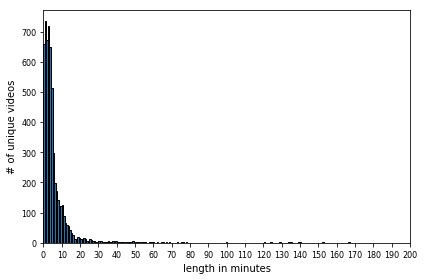

In [108]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

frequency_plot_df=df[['youtubeId', 'video_duration']].copy()
frequency_plot_df.drop_duplicates(keep='first', inplace=True)
durations = frequency_plot_df['video_duration']/60.0
duration_values = abs(durations.values)
print(duration_values.min())
print(duration_values.max())


num_bins = 200
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x=duration_values, bins=num_bins, rwidth=1.0, ec="k")
# labels
ax.set_xlabel('length in minutes')
ax.set_ylabel('# of unique videos')

# update the view limits
ax.set_xlim(0, duration_values.max())

# update the ticks
ax.set_xticks(range(0, len(bins), 10))
ax.tick_params(axis='both', which='major', labelsize=8)
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()
fig.savefig('length_distribution_videos.png', dpi=300, format='png', bbox_inches='tight')

0.09
26.7


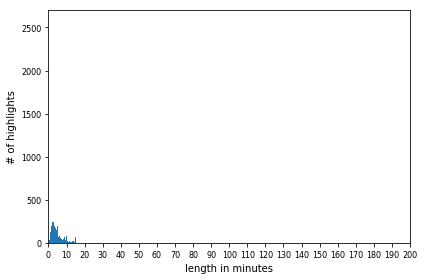

In [110]:
# not useful
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

frequency_plot_df=df[['youtubeId', 'duration']].copy()
durations = frequency_plot_df['duration']
duration_values = abs(durations.values)
print(duration_values.min())
print(duration_values.max())pip install wordcloud

num_bins = 200
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x=duration_values, bins=num_bins, rwidth=1.0)
# labels
ax.set_xlabel('length in minutes')
ax.set_ylabel('# of highlights')

# update the view limits
ax.set_xlim(0, duration_values.max())

# update the ticks
ax.set_xticks(range(0, len(bins), 10))
ax.tick_params(axis='both', which='major', labelsize=8)
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()
fig.savefig('length_distribution_highlights.png', dpi=300, format='png', bbox_inches='tight')

In [115]:
import json
category_information = json.load(open(os.path.join(DATA_DIR, 'keywords_to_video_mapping_sorted.json'),'r'))


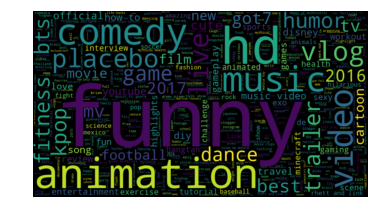

<Figure size 432x288 with 0 Axes>

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Generating wordcloud. Relative scaling value is to adjust the importance of a frequency word.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(category_information)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('word_cloud.png', dpi=300, format='png', bbox_inches='tight')